## Making Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
file_path = '/kaggle/input/football-players-data/fifa_players.csv'

In [4]:
df = pd.read_csv(file_path)
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


## Data Cleaning

In [5]:
drop_cols = ['name', 'full_name', 'birth_date', 'positions', 'nationality']
df = df.drop(columns=drop_cols, errors='ignore')

df = df.fillna(df.mean(numeric_only=True))  # for missing data we fill with column mean

df = pd.get_dummies(df, drop_first=True)   # One-Hot Encode categorical columns automatically

## Defining Input and Target Features

In [6]:
X = df.drop(columns=['overall_rating'])
y = df['overall_rating']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Applying Sklearns PCA and Linear Regression and Training the Model

In [8]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original features: {X_train.shape[1]}")
print(f"Reduced features after PCA: {X_train_pca.shape[1]}")

Original features: 181
Reduced features after PCA: 133


In [9]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

## Model Evaluation

In [10]:
y_pred = model.predict(X_test_pca)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.8590
RMSE: 2.6548
MAE: 2.0101


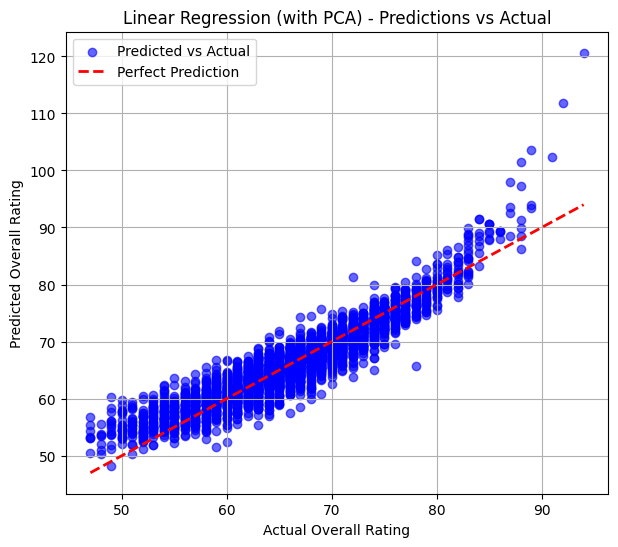

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Prediction")

plt.xlabel("Actual Overall Rating")
plt.ylabel("Predicted Overall Rating")
plt.title("Linear Regression (with PCA) - Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pickle

with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)